<a href="https://colab.research.google.com/github/gquinche/Optimization/blob/main/Proyecto/Onlineprodiplosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparación notebook




Por facilidad puedes ejecutar el script en colab directamente.

Sin embargo si quieres instalar localmente los paquetes y archivos puedes instalar conda y usar el siguiente comando como un archivo ".sh" en  *LINUX*. 

Asi los mismos estaran encapsulados y no generaran conflictos con tus paquetes o python global.

```
ENVNAME=prodi2 
source /home/biocompu/anaconda3/etc/profile.d/conda.sh
conda create --name $ENVNAME python=3.7
conda activate $ENVNAME
conda install pip
pip install jupyter_http_over_ws
cd ~/anaconda3/envs/$ENVNAME
conda info --envs
jupyter serverextension enable --py jupyter_http_over_ws
jupyter notebook   --NotebookApp.allow_origin='https://colab.research.google.com'   --port=8888   --NotebookApp.port_retries=0
```




## Los siguientes son la instalacion de los paquetes

In [1]:
%%writefile requirements.txt
matplotlib==3.2.2
pandas==1.3.5
torch @ https://download.pytorch.org/whl/cu113/torch-1.11.0%2Bcu113-cp37-cp37m-linux_x86_64.whl
#torch==1.11.0+cu113
torchvision @ https://download.pytorch.org/whl/cu113/torchvision-0.12.0%2Bcu113-cp37-cp37m-linux_x86_64.whl
#torchvision==0.12.0
#pathlib==1.0.1
pillow==9.0.1


Writing requirements.txt


In [2]:
!pip install -r requirements.txt
#@markdown For PIL incompatibilities use the restart runtime option in Runtime menu to switch PIL version

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████▎               | 834.1 MB 1.3 MB/s eta 0:10:30tcmalloc: large alloc 1147494400 bytes == 0x27d2000 @  0x7fe32ee51615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |████████████████████▋           | 1055.7 MB 1.3 MB/s eta 0:07:28tcmalloc: large alloc 1434370048 bytes == 0x46e28000 @  0x7fe32ee51615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |██████████████████████████▏     | 1336.2 MB 1.3 MB/s eta 0:04:00tcmalloc: l

In [11]:
#@title Importado librerias: np, pandas, PIL y glob (imagenes) y torch 
%matplotlib inline 
#to show plots in collab
import pandas as pd
import numpy as np

#instalar si es necesario con !pip install
from PIL import Image 
import glob 
import pathlib 

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms

import matplotlib.pyplot as plt



In [3]:
#@title
!conda install --channel conda-forge gsutil --yes  # needed if running locally 

/bin/bash: conda: command not found


In [4]:
!which gsutil

/tools/google-cloud-sdk/bin/gsutil


In [5]:
#@title Descarga de archivos de entrenamiento
!gsutil -m cp -r gs://images9r0d1 .

Copying gs://images9r0d1/models...
Copying gs://images9r0d1/optimizer...
Copying gs://images9r0d1/firstbatch/103.jpg...
Copying gs://images9r0d1/firstbatch/102.jpg...
Copying gs://images9r0d1/firstbatch/100.jpg...
Copying gs://images9r0d1/firstbatch/101.jpg...
Copying gs://images9r0d1/firstbatch/10.jpg...
Copying gs://images9r0d1/properties.csv...
Copying gs://images9r0d1/firstbatch/104.jpg...
Copying gs://images9r0d1/firstbatch/1.jpg...
Copying gs://images9r0d1/firstbatch/105.jpg...
Copying gs://images9r0d1/firstbatch/106.jpg...
Copying gs://images9r0d1/firstbatch/107.jpg...
Copying gs://images9r0d1/firstbatch/108.jpg...
Copying gs://images9r0d1/firstbatch/109.jpg...
Copying gs://images9r0d1/firstbatch/11.jpg...
Copying gs://images9r0d1/firstbatch/110.jpg...
Copying gs://images9r0d1/firstbatch/111.jpg...
Copying gs://images9r0d1/firstbatch/112.jpg...
Copying gs://images9r0d1/firstbatch/113.jpg...
Copying gs://images9r0d1/firstbatch/114.jpg...
Copying gs://images9r0d1/firstbatch/115.jp

In [6]:
!ls ./images9r0d1/firstbatch

100.jpg  113.jpg  19.jpg  31.jpg  44.jpg  57.jpg  6.jpg   82.jpg  95.jpg
101.jpg  114.jpg  1.jpg   32.jpg  45.jpg  58.jpg  70.jpg  83.jpg  96.jpg
102.jpg  115.jpg  20.jpg  33.jpg  46.jpg  59.jpg  71.jpg  84.jpg  97.jpg
103.jpg  116.jpg  21.jpg  34.jpg  47.jpg  5.jpg   72.jpg  85.jpg  98.jpg
104.jpg  117.jpg  22.jpg  35.jpg  48.jpg  60.jpg  73.jpg  86.jpg  99.jpg
105.jpg  118.jpg  23.jpg  36.jpg  49.jpg  61.jpg  74.jpg  87.jpg  9.jpg
106.jpg  11.jpg   24.jpg  37.jpg  4.jpg   62.jpg  75.jpg  88.jpg
107.jpg  12.jpg   25.jpg  38.jpg  50.jpg  63.jpg  76.jpg  89.jpg
108.jpg  13.jpg   26.jpg  39.jpg  51.jpg  64.jpg  77.jpg  8.jpg
109.jpg  14.jpg   27.jpg  3.jpg   52.jpg  65.jpg  78.jpg  90.jpg
10.jpg	 15.jpg   28.jpg  40.jpg  53.jpg  66.jpg  79.jpg  91.jpg
110.jpg  16.jpg   29.jpg  41.jpg  54.jpg  67.jpg  7.jpg   92.jpg
111.jpg  17.jpg   2.jpg   42.jpg  55.jpg  68.jpg  80.jpg  93.jpg
112.jpg  18.jpg   30.jpg  43.jpg  56.jpg  69.jpg  81.jpg  94.jpg


# Extraccion de datos
9R0D1 es un codigo usada para guardar en la nube los datos relacionados a este algoritmo de reconocimiento de prodiplosis, si estas teniendo problema accediendo a estos datos puedes contactar con nosotros con un pantallazo del problema.

In [7]:
properties = pd.read_csv("./images9r0d1/properties.csv")

#cambiamos unos formato
properties['Imagen'] = properties['Imagen'].astype(int)
properties['color y forma'] = properties['color y forma'].astype(float)
print(properties)

     Imagen  ovopositor  alas  antenas  color y forma  general  groups  \
0         1         0.0   1.0      0.0            1.0     80.0     0.0   
1         2         0.0   1.0      1.0            1.0     80.0     1.0   
2         3         0.0   0.0      1.0            1.0     60.0     1.0   
3         4         0.0   0.0      1.0            1.0     50.0     0.0   
4         5         0.0   0.0      1.0            1.0     50.0     0.0   
..      ...         ...   ...      ...            ...      ...     ...   
113     114         0.0   0.0      0.0            0.0      0.0     0.0   
114     115         0.0   0.0      0.0            0.0      0.0     0.0   
115     116         0.0   0.0      0.0            0.0      0.0     0.0   
116     117         0.0   0.0      0.0            0.0      0.0     0.0   
117     118         0.0   0.0      0.0            0.0      0.0     0.0   

     quality  
0          1  
1          1  
2          1  
3          1  
4          1  
..       ...  
113   

In [13]:
PATH = "./images9r0d1/firstbatch/*.jpg"

image_map = map(Image.open, glob.glob(PATH)) 
image_mapcopy = map(Image.open, glob.glob(PATH)) 
tensorims = [0]*len(list(image_mapcopy))
imagelist = []
print(tensorims)

for i,image in enumerate(image_map,0):
  minusjpg = image.filename[:-4] #remove  .jpg end
  filename = minusjpg[len(PATH)-5:] #discount five chars to start from "*.jpg"  asterisk 
  score = properties['general'][int(filename)-1] #for zero indexing
  imagelist.append((int(filename),torch.tensor(score,dtype=torch.float32).view(1)/100))
  tensorims[int(filename)-1]=(transforms.ToTensor()(image).unsqueeze_(0)) # para importar imagenes a torch como tensor

print(imagelist)
print(sorted(imagelist))


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[(98, tensor([0.])), (50, tensor([0.])), (23, tensor([0.2000])), (5, tensor([0.5000])), (43, tensor([0.])), (29, tensor([0.1000])), (104, tensor([0.])), (76, tensor([0.])), (96, tensor([0.])), (12, tensor([0.3000])), (105, tensor([0.])), (75, tensor([0.2000])), (77, tensor([0.1000])), (6, tensor([0.5000])), (91, tensor([0.])), (97, tensor([0.])), (39, tensor([0.])), (101, tensor([0.])), (26, tensor([0.2000])), (117, tensor([0.])), (92, tensor([0.])), (60, tensor([0.5000])), (81, tensor([0.1000])), (58, tensor([0.6000])), (65, tensor([0.2000])), (102, tensor([0.])), (51, tensor([0.])), (56, tensor([0.8000])), (45, tensor([0.])), (17, tens

(1, tensor([0.8000]))


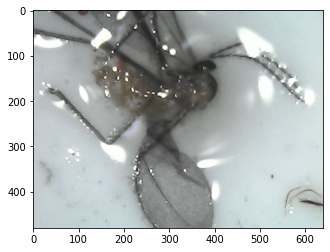

(2, tensor([0.8000]))


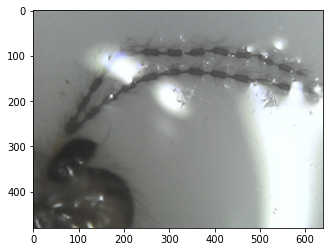

(3, tensor([0.6000]))


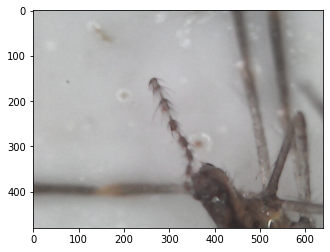

(4, tensor([0.5000]))


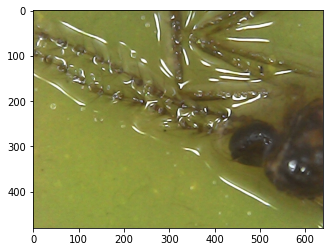

(5, tensor([0.5000]))


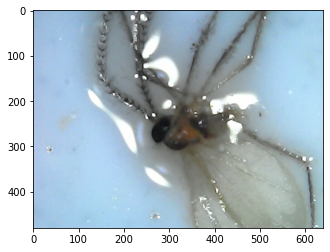

(6, tensor([0.5000]))


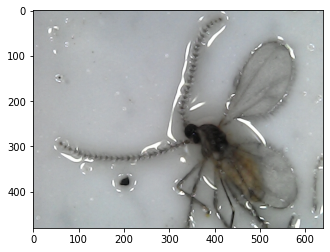

(7, tensor([0.3000]))


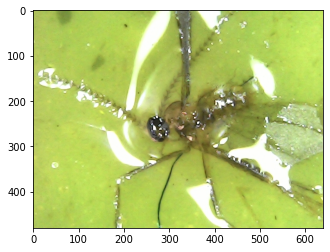

(8, tensor([0.3000]))


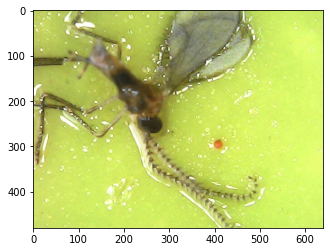

(9, tensor([0.3000]))


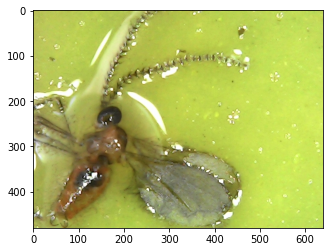

(10, tensor([0.3000]))


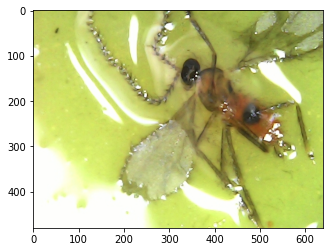

In [14]:
import matplotlib.pyplot as plt
for i,imScore in enumerate(sorted(imagelist),0):
  if(i<10):
    print(imScore)
    plt.imshow(torch.flatten(tensorims[imScore[0]],0,1).permute(1, 2, 0))
    plt.show()

(1, tensor([0.8000]))


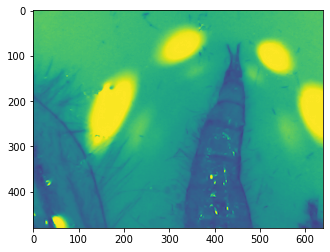


(2, tensor([0.8000]))


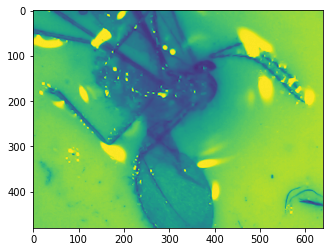


(3, tensor([0.6000]))


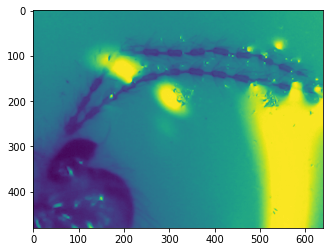


(4, tensor([0.5000]))


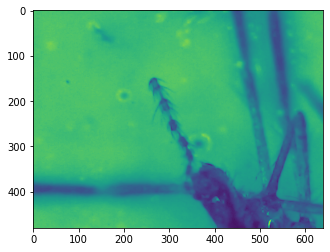


(5, tensor([0.5000]))


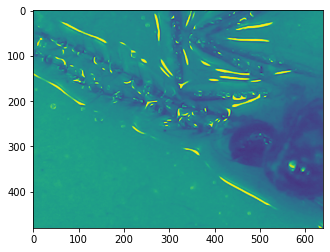


(6, tensor([0.5000]))


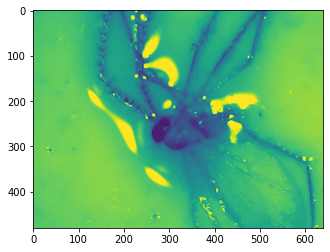


(7, tensor([0.3000]))


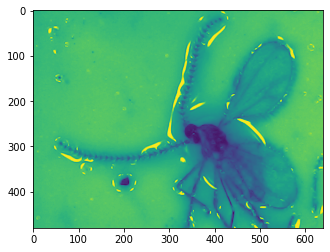


(8, tensor([0.3000]))


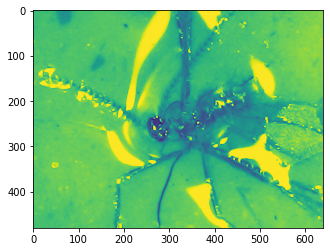


(9, tensor([0.3000]))


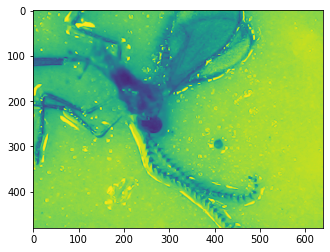


(10, tensor([0.3000]))


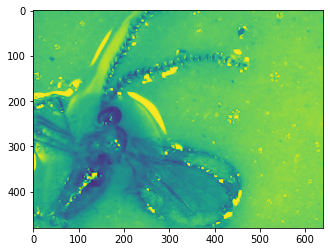

In [15]:
import torchvision
import matplotlib.pyplot as plt
for i,imScore in enumerate(sorted(imagelist),0):
  if(i<10):
    print(imScore)
    blackwhite = torchvision.transforms.Grayscale()(tensorims[imScore[0]-1])
    plt.imshow(torch.flatten(blackwhite,0,2))
    plt.show()
    print()

# Creacion de la red

In [16]:


torch.manual_seed(0)
class Net(nn.Module):
# variation on Alex net
    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel

        
        self.conv1 = nn.Conv2d(1, 96, (11,11),stride=4) #the three is for rgb
        self.conv2 = nn.Conv2d(96, 256, (5,5),padding=2)
        self.conv3 = nn.Conv2d(256,384,(3,3),padding=1)
        self.conv4 = nn.Conv2d(384,384,(3,3),padding=1)
        self.conv5 = nn.Conv2d(384,256,(3,3),padding=1)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(256 * 6 * 6, 4096)
        self.fc2 = nn.Linear(4096, 1024)
        self.fc3 = nn.Linear(1024, 1)
        # self.fc3 = nn.Linear(256 * 6 * 6, 1)

    def forward(self, x):
        #Alex net BUT WITH GRAYSCALE

        x = torchvision.transforms.Grayscale()(x)
        # Max pooling over a (2, 2) window
        x = transforms.Normalize((0.5),(0.2))(x)
        
        x = nn.AdaptiveAvgPool2d((227,227))(x) #only compresses a little image
        
        #para previsualizar compresion
        # plt.imshow(torch.flatten(x,0,2))
        # plt.show()
        
        x = F.max_pool2d(F.leaky_relu(self.conv1(x)), (3,3),stride=2)
        x = F.max_pool2d(F.leaky_relu(self.conv2(x)),(3,3),stride=2)
        x = F.leaky_relu(self.conv3(x))
        x = F.leaky_relu(self.conv4(x))
        x = F.max_pool2d(F.leaky_relu(self.conv5(x)),(3,3),stride=2)

        x = torch.flatten(x, 0) #flatten all dimensions except the batch dimension
        x = F.leaky_relu(self.fc1(x))
        x = F.leaky_relu(self.fc2(x))
        # print(x)
        # x = torch.arctan(self.fc3(x))+(torch.pi/2)/(torch.pi)
        return torch.sigmoid(self.fc3(x))


net = Net()
print(net)
for i,imAndScore in enumerate(sorted(imagelist)):
  # print(imp)
  if(i>10):break
  print(imAndScore)
  out = net(tensorims[imAndScore[0]-1])
  print(out)
  
  # print(out)

Net(
  (conv1): Conv2d(1, 96, kernel_size=(11, 11), stride=(4, 4))
  (conv2): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv3): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=9216, out_features=4096, bias=True)
  (fc2): Linear(in_features=4096, out_features=1024, bias=True)
  (fc3): Linear(in_features=1024, out_features=1, bias=True)
)
(1, tensor([0.8000]))
tensor([0.5074], grad_fn=<SigmoidBackward0>)
(2, tensor([0.8000]))
tensor([0.5072], grad_fn=<SigmoidBackward0>)
(3, tensor([0.6000]))
tensor([0.5070], grad_fn=<SigmoidBackward0>)
(4, tensor([0.5000]))
tensor([0.5075], grad_fn=<SigmoidBackward0>)
(5, tensor([0.5000]))
tensor([0.5073], grad_fn=<SigmoidBackward0>)
(6, tensor([0.5000]))
tensor([0.5070], grad_fn=<SigmoidBackward0>)
(7, tensor([0.3000]))
ten

In [17]:
for param_tensor in net.state_dict():
    print(param_tensor, "\t", net.state_dict()[param_tensor].size())

conv1.weight 	 torch.Size([96, 1, 11, 11])
conv1.bias 	 torch.Size([96])
conv2.weight 	 torch.Size([256, 96, 5, 5])
conv2.bias 	 torch.Size([256])
conv3.weight 	 torch.Size([384, 256, 3, 3])
conv3.bias 	 torch.Size([384])
conv4.weight 	 torch.Size([384, 384, 3, 3])
conv4.bias 	 torch.Size([384])
conv5.weight 	 torch.Size([256, 384, 3, 3])
conv5.bias 	 torch.Size([256])
fc1.weight 	 torch.Size([4096, 9216])
fc1.bias 	 torch.Size([4096])
fc2.weight 	 torch.Size([1024, 4096])
fc2.bias 	 torch.Size([1024])
fc3.weight 	 torch.Size([1, 1024])
fc3.bias 	 torch.Size([1])


In [18]:
for i,tensor in enumerate(net.parameters(),0): 
  if(i==14): print(tensor) #last set of weights
  if(i==15): print(tensor) #last bias

Parameter containing:
tensor([[ 0.0159, -0.0217,  0.0098,  ...,  0.0219,  0.0024,  0.0121]],
       requires_grad=True)
Parameter containing:
tensor([0.0310], requires_grad=True)


En este notebook vamos a cargar los pesos de un modelo preentrenado, mientras en este otro [](https://colab.research.google.com/drive/1jgdPiDv-nWToO7I4mw5Uhpo6JT8GpiLC#scrollTo=lVdZtQkHWhbJ)

In [ ]:

torch.manual_seed(0)
net = Net()

In [ ]:
!gsutil -m cp -r gs://images9r0d1/pretrain . 

In [ ]:
net.load_state_dict(torch.load("./pretrain/models2"))
net.eval()

In [ ]:
for i,imAndScore in enumerate(sorted(imagelist)):
  # print(imp)
  if(i>100):break
  print(imAndScore)
  out = net(tensorims[imAndScore[0]-1])
  print(out)
  
  # print(out)

Zero the gradient buffers of all parameters and backprops with random
gradients:



In [19]:
optimizer = optim.Adam(net.parameters(), lr=0.00001)

for i,j in enumerate(net.parameters()):
            # print(j)
            if i==14: #imprime ultimos weight
              print(j)

losscounter = 0

for epoch in range(100):  # loop over the dataset multiple times
  val = 0.5 if (epoch == 0) else 0 #first train to recognize everything as prodiplosis
  running_loss = 0.0
  for i, data in enumerate(sorted(imagelist), 0):
      # get the inputs; data is a list of [inputs, labels]
      imageref = data[0]
      losscounter += 1
      score = data[1]
      inputs = tensorims[data[0]-1]
      labels = data[1]
      optimizer.zero_grad()
      outputs = net(inputs)
      multi =  50**labels #intentamos hacer que tenga mas en cuenta los pesos positivos 

      try:
        loss = nn.L1Loss()(outputs, labels) * multi
      except RuntimeError:
        print(outputs)
        print(labels)
      loss.backward()
      optimizer.step()

      # print statistics
      running_loss += loss.item()
      if labels>0.5:    # print every 2000 mini-batches
        print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss/losscounter:.3f}')
        running_loss = 0.0
        losscounter = 0
        print(f"with image {imageref} got output {outputs} when correct label was {labels} got an score of {loss} and changed parameters like so \n")
        for i,j in enumerate(net.parameters()):
          # print(j)
          if i==14: #imprime ultimos weight
            print(j)

print('Finished Training')

Se truncaron las últimas líneas 5000 del resultado de transmisión.
tensor([[ 0.0179, -0.0213,  0.0082,  ...,  0.0199,  0.0023,  0.0105]],
       requires_grad=True)
[22,    52] loss: 0.375
with image 52 got output tensor([0.6855], grad_fn=<SigmoidBackward0>) when correct label was tensor([0.8000]) got an score of tensor([2.6175], grad_fn=<MulBackward0>) and changed parameters like so 

Parameter containing:
tensor([[ 0.0178, -0.0213,  0.0083,  ...,  0.0200,  0.0022,  0.0106]],
       requires_grad=True)
[22,    53] loss: 2.621
with image 53 got output tensor([0.8225], grad_fn=<SigmoidBackward0>) when correct label was tensor([0.9000]) got an score of tensor([2.6206], grad_fn=<MulBackward0>) and changed parameters like so 

Parameter containing:
tensor([[ 0.0178, -0.0213,  0.0083,  ...,  0.0200,  0.0023,  0.0106]],
       requires_grad=True)
[22,    54] loss: 3.945
with image 54 got output tensor([0.7833], grad_fn=<SigmoidBackward0>) when correct label was tensor([0.9000]) got an score 

KeyboardInterrupt: ignored

In [ ]:
PATH = "./models"
torch.save(net.state_dict(),PATH)


In [ ]:
PATH = "./optimizer"
torch.save(optimizer.state_dict(),PATH)

In [ ]:
pwd

# L1 regularization for sparcity
we penalize weight to try and get a robust model

In [ ]:
l1_reg = None
for W in net.parameters():
    if l1_reg is None:
        l1_reg = W.norm(1)
    else:
        l1_reg = l1_reg + W.norm(1)
lambda1 =0.5 

In [ ]:
def regloss(output,target):
  return nn.L1Loss()(output, target)+(l1_reg.sum() * lambda1).values()



In [ ]:
imagelist[]

In [ ]:
inputs = tensorims[4]
      labels = imagelist[]
      # zero the parameter gradients
      # optimizer.zero_grad()

      # forward + backward + optimize
      outputs = net(inputs)
      # print(outputs)
      # print(labels)
      loss = nn.BCELoss()(outputs, labels)
      loss.backward()
      optimizer.step()

      # print statistics
      running_loss += loss.item()
      if i % 20 == 19:    # print every 2000 mini-batches
          print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
          running_loss = 0.0
          print(f"with image {imageref} got output {outputs} got an score of {loss}")
          # print(tensorims[data[0]-1])


# Referencias 

Boyd, Stephen, et al. "Distributed optimization and statistical learning via the alternating direction method of multipliers." Foundations and Trends® in Machine learning 3.1 (2011): 1-122.

Coast, Gold, et al. "Convex optimization: a new approach to common challenges in premium rating." (2010).